In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
data = pd.read_csv(r"C:\Users\harri\ML PROJECT\mental health prediction using machine learning\Data\Survey.csv")

In [6]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [7]:
data.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [8]:
data.shape

(1259, 27)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

<AxesSubplot:>

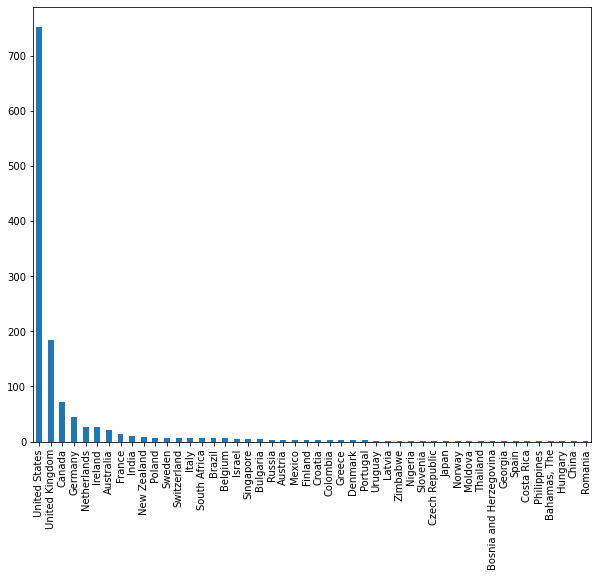

In [10]:
data['Country'].value_counts().plot(kind='bar',figsize=(10,8))

In [11]:
data.drop(['Country','state','Timestamp','comments'], axis = 1, inplace=True)

In [12]:
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [13]:
data['self_employed'].value_counts()


No     1095
Yes     146
Name: self_employed, dtype: int64

In [14]:
data['self_employed'].fillna('No', inplace=True)

In [15]:
data['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [16]:
data['work_interfere'].fillna('N/A',inplace=True)

<AxesSubplot:>

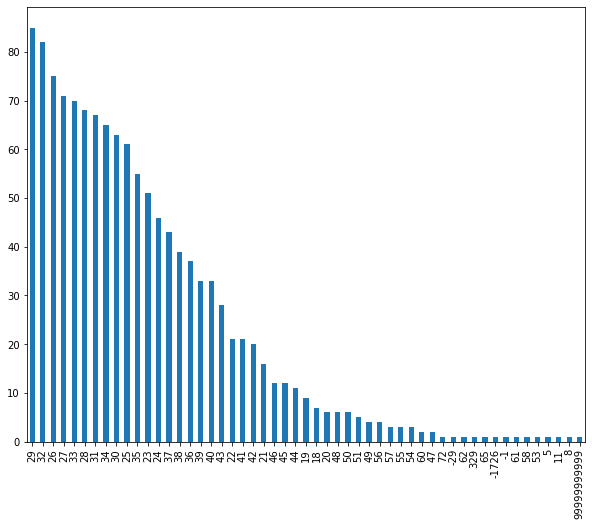

In [17]:
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

In [18]:
data.drop(data[(data[ 'Age' ]>60)  |  (data[ 'Age' ]<18)] .index,  inplace=True)

<AxesSubplot:>

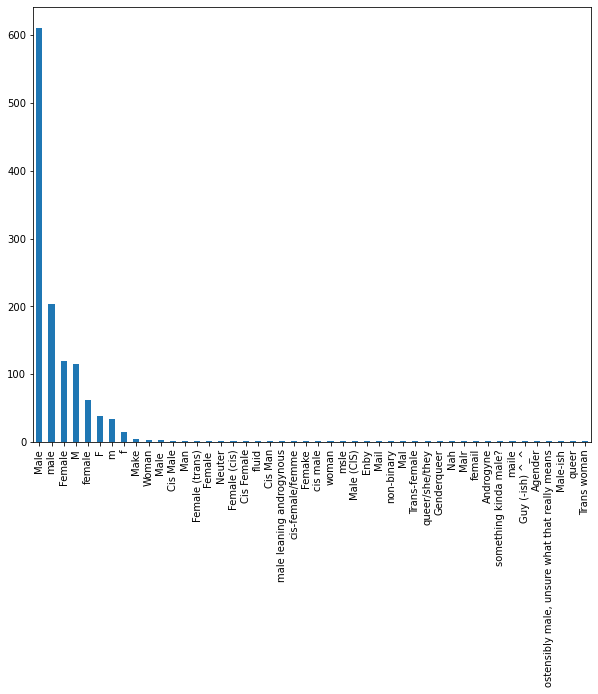

In [19]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))


In [23]:
data['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male','Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make' , ], 'Male', inplace = True)

data['Gender'].replace([ 'Female ', 'female', 'F', 'f', 'Woman', 'Female',
                         'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                         'woman',], 'Female', inplace=True)
data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male learning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Non-Binary', inplace=True)

C:\Users\harri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

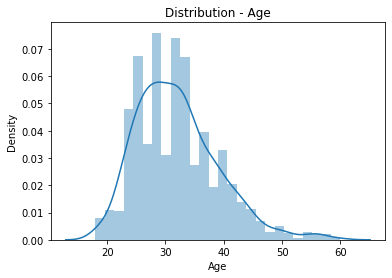

In [24]:
sb.distplot(data["Age"])
plt.title("Distribution - Age")
plt.xlabel("Age")

C:\Users\harri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Employment Type')

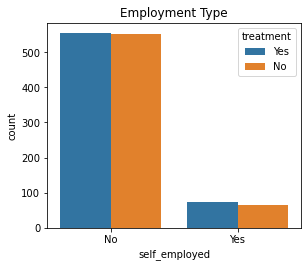

In [25]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data['self_employed'], hue = data['treatment'])
plt.title('Employment Type')


C:\Users\harri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Family_History')

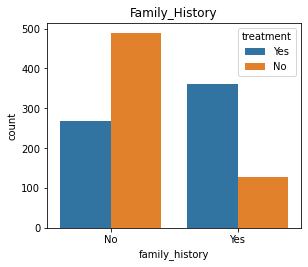

In [26]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sb.countplot(data['family_history'], hue = data['treatment'])
plt.title('Family_History')


C:\Users\harri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Work Interfere')

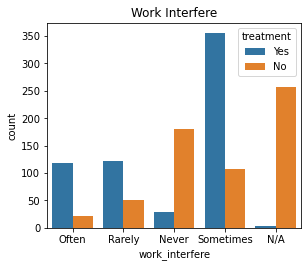

In [27]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,3)
sb.countplot(data['work_interfere'], hue = data['treatment'])
plt.title('Work Interfere')


C:\Users\harri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Work Type')

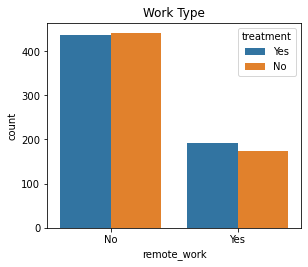

In [28]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,4)
sb.countplot(data['remote_work'], hue = data['treatment'])
plt.title('Work Type')


C:\Users\harri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Company')

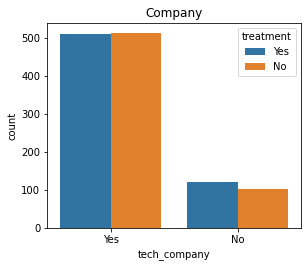

In [29]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,5)
sb.countplot(data['tech_company'], hue = data['treatment'])
plt.title('Company')


C:\Users\harri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Benefits')

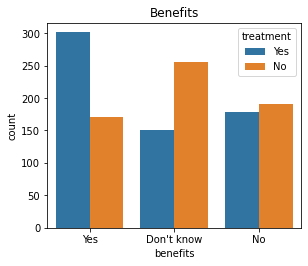

In [30]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,6)
sb.countplot(data['benefits'], hue = data['treatment'])
plt.title('Benefits')

C:\Users\harri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Care Options')

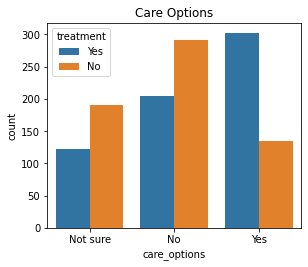

In [31]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,7)
sb.countplot(data['care_options'], hue = data['treatment'])
plt.title('Care Options')


C:\Users\harri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Equal importance to Mental and Physical health')

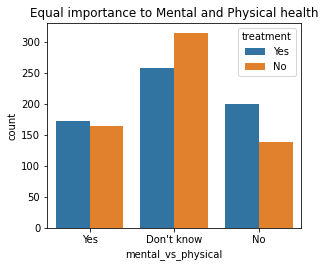

In [32]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sb.countplot(data['mental_vs_physical'], hue = data['treatment'])
plt.title('Equal importance to Mental and Physical health')


C:\Users\harri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Wellness Program')

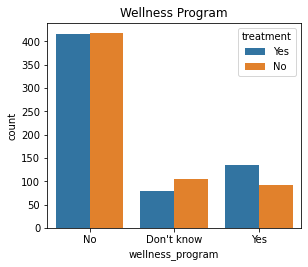

In [33]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,9)
sb.countplot(data['wellness_program'], hue = data['treatment'])
plt.title('Wellness Program')


C:\Users\harri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Anonymity')

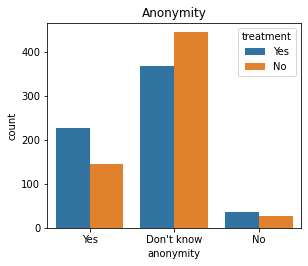

In [34]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,10)
sb.countplot(data['anonymity'], hue = data['treatment'])
plt.title('Anonymity')

C:\Users\harri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Leave')

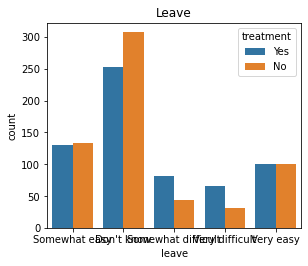

In [35]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,11)
sb.countplot(data['leave'], hue = data['treatment'])
plt.title('Leave')

C:\Users\harri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mental Health Consequence')

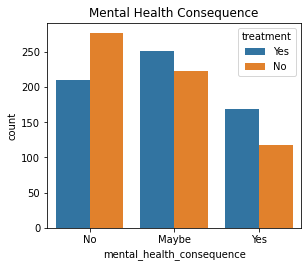

In [36]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,12)
sb.countplot(data['mental_health_consequence'], hue = data['treatment'])
plt.title('Mental Health Consequence')


C:\Users\harri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Physical Health Consequence')

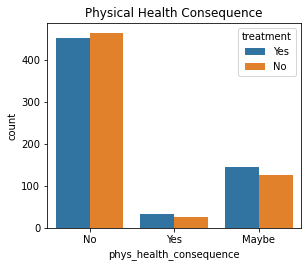

In [37]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,13)
sb.countplot(data['phys_health_consequence'], hue = data['treatment'])
plt.title('Physical Health Consequence')


C:\Users\harri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Discussion With Coworkers')

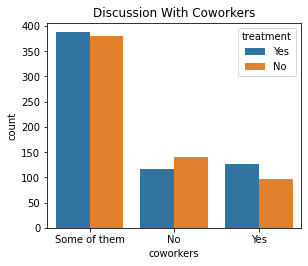

In [38]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,14)
sb.countplot(data['coworkers'], hue = data['treatment'])
plt.title('Discussion With Coworkers')

C:\Users\harri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Discussion With Supervisor')

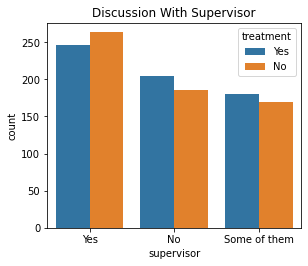

In [39]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,15)
sb.countplot(data['supervisor'], hue = data['treatment'])
plt.title('Discussion With Supervisor')


C:\Users\harri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Discussion With Interviewer')

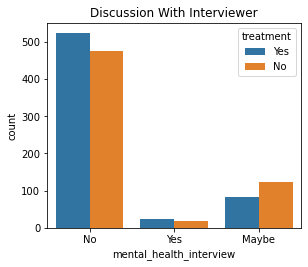

In [40]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,16)
sb.countplot(data['mental_health_interview'], hue = data['treatment'])
plt.title('Discussion With Interviewer')


C:\Users\harri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Discussion With Interviewer')

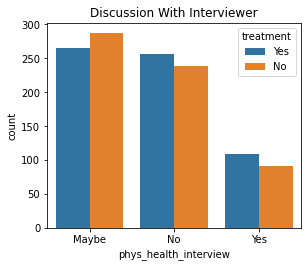

In [41]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,17)
sb.countplot(data['phys_health_interview'], hue = data['treatment'])
plt.title('Discussion With Interviewer')


C:\Users\harri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Consequence After Disclosure')

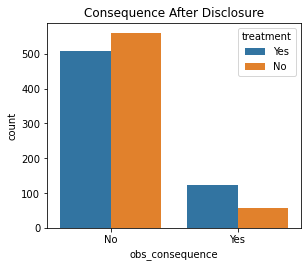

In [42]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,18)
sb.countplot(data['obs_consequence'], hue = data['treatment'])
plt.title('Consequence After Disclosure')


In [43]:
data.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247,1247,1247,1247,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
unique,NaN,4,2,2,2,5,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,26-100,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,983,1107,759,630,463,288,879,1023,471,...,811,560,487,918,767,509,1000,553,573,1068
mean,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
X = data.drop('treatment', axis = 1)
y = data['treatment']

In [45]:
from sklearn. compose import ColumnTransformer
from sklearn. preprocessing import LabelEncoder, OrdinalEncoder

In [46]:
X = data.drop('treatment', axis = 1)
y = data['treatment']

In [47]:
ct = ColumnTransformer([('oe',OrdinalEncoder(),['Gender', 'self_employed', 'family_history',
       'work_interfere','no_employees', 'remote_work' , 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',  
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',              
       'mental_vs_physical', 'obs_consequence' ])],remainder='passthrough')


In [48]:
X = ct.fit_transform(X)

In [49]:
le = LabelEncoder()
y = le.fit_transform(y) 

In [50]:
import joblib
joblib.dump(ct,'feauture_values')

['feauture_values']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=49)


In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((872, 22), (375, 22), (872,), (375,))

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier 
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc

In [55]:
model_dict = {}

model_dict['Logistic regression']= LogisticRegression(solver='liblinear', random_state=49)
model_dict['KNN Classifier' ] = KNeighborsClassifier()
model_dict['Decision Tree Classifier' ] = DecisionTreeClassifier(random_state=49)
model_dict ['Random Forest Classifier'] = RandomForestClassifier(random_state=49)
model_dict ['AdaBoost Classifier' ] = AdaBoostClassifier(random_state=49)
model_dict ['Gradient Boosting Classifier' ] = GradientBoostingClassifier(random_state=49)
model_dict['XGB Classifier'] = XGBClassifier(random_state=49)


In [68]:
def model_test (X_train, X_test, y_train, y_test,model,model_name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('======================================{}======================================='.format(model_name))
    print('Score is : {}'.format(accuracy))
    
    print()

In [69]:
for model_name,model in model_dict.items():
    model_test(X_train, X_test, y_train, y_test, model, model_name)

======================================Logistic regression=======================================
Score is : 0.8453333333333334

======================================KNN Classifier=======================================
Score is : 0.7786666666666666

======================================Decision Tree Classifier=======================================
Score is : 0.7866666666666666

======================================Random Forest Classifier=======================================
Score is : 0.856

======================================AdaBoost Classifier=======================================
Score is : 0.8533333333333334

======================================Gradient Boosting Classifier=======================================
Score is : 0.8453333333333334

[10:55:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to resto

C:\Users\harri\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [70]:
abc = AdaBoostClassifier(random_state=99)
abc.fit(X_train,y_train)
pred_abc = abc.predict(X_test)
print ('Accuracy of AdaBoost=',accuracy_score(y_test,pred_abc))


Accuracy of AdaBoost= 0.8533333333333334


In [72]:
from sklearn.model_selection import RandomizedSearchCV
params_abc = {'n_estimators': [int(x) for x in np.linspace(start = 1, stop = 50, num = 15)],
          'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
          }   
abc_random = RandomizedSearchCV(random_state=49,estimator=abc,param_distributions = params_abc,n_iter =50,cv=5,n_jobs=-1)


In [73]:
params_abc

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [74]:
abc_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=99),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]},
                   random_state=49)

In [75]:
abc_random.best_params_

{'n_estimators': 11, 'learning_rate': 1.02}

In [88]:
abc_tuned = AdaBoostClassifier(random_state=49,n_estimators=11, learning_rate=1.02)
abc_tuned.fit(X_train,y_train)
pred_abc_tuned = abc_tuned.predict(X_test)
print('Accuracy of Adaboost(tuned)=',accuracy_score(y_test,pred_abc_tuned))


Accuracy of Adaboost(tuned)= 0.8693333333333333


Text(33.0, 0.5, 'Actual')

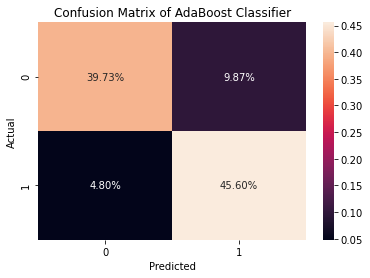

In [89]:
cf_matrix = confusion_matrix(y_test, pred_abc)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel ('Actual')


Text(33.0, 0.5, 'Actual')

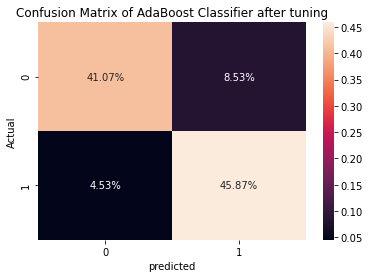

In [92]:
cf_matrix = confusion_matrix(y_test, pred_abc_tuned)
sb.heatmap (cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier after tuning')
plt.xlabel('predicted')
plt.ylabel('Actual')


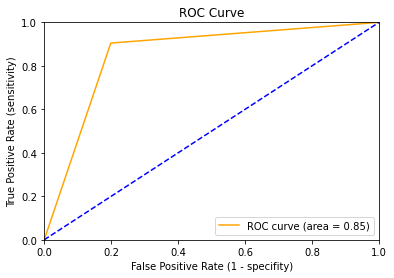

(array([0.        , 0.19892473, 1.        ]),
 array([0.       , 0.9047619, 1.       ]),
 array([2, 1, 0]))

In [94]:
from sklearn import metrics
fpr_abc, tpr_abc, thresholds_abc = roc_curve(y_test, pred_abc)
roc_auc_abc = metrics.auc(fpr_abc, tpr_abc)
plt.plot(fpr_abc, tpr_abc, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_abc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - specifity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test, pred_abc)

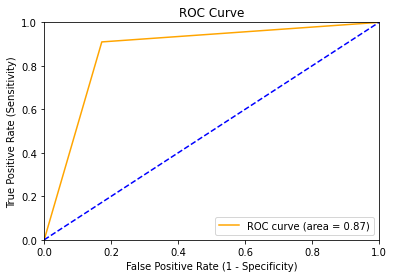

(array([0.        , 0.17204301, 1.        ]),
 array([0.        , 0.91005291, 1.        ]),
 array([2, 1, 0]))

In [95]:
fpr_abc_tuned, tpr_abc_tuned, thresholds_abc_tuned = roc_curve(y_test, pred_abc_tuned)
roc_auc_abc_tuned = metrics.auc(fpr_abc_tuned, tpr_abc_tuned)
plt.plot(fpr_abc_tuned, tpr_abc_tuned, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_abc_tuned)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve' )
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)' )
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test, pred_abc_tuned)

In [96]:
print(classification_report(y_test,pred_abc))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       186
           1       0.82      0.90      0.86       189

    accuracy                           0.85       375
   macro avg       0.86      0.85      0.85       375
weighted avg       0.86      0.85      0.85       375



In [97]:
print(classification_report(y_test,pred_abc_tuned))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       186
           1       0.84      0.91      0.88       189

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



In [98]:
import pickle
pickle.dump(abc_tuned,open('model.pk1','wb'))